# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [2]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

C:\Users\chakr\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


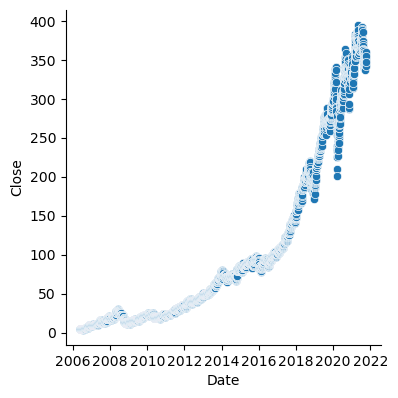

In [3]:
# Using pairplot we'll visualize the data for correlation
# sns.pairplot(stocks_df,x_vars=['Open','High','Low','Close','Volume'],y_vars='Date',size=4,kind='scatter',aspect=1)
# plt.show()
# sns.pairplot(stocks_df,y_vars=['Open','High','Low','Close','Volume'],x_vars='Year',size=4,kind='scatter',aspect=1)
# plt.show()
sns.pairplot(stocks_df,y_vars='Close',x_vars='Date',size=4,kind='scatter',aspect=1)
plt.show()

C:\Users\chakr\AppData\Local\Temp\ipykernel_27780\969354333.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stocks_df.corr(),cmap="YlGnBu", annot = True)


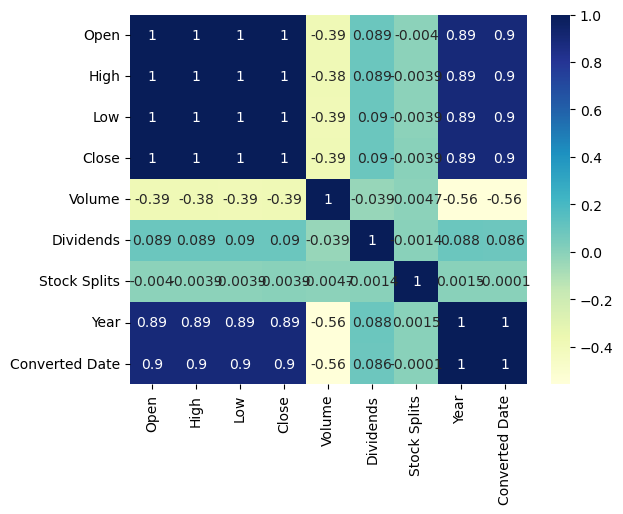

In [4]:
# Visualizing the data using heatmap
sns.heatmap(stocks_df.corr(),cmap="YlGnBu", annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [5]:
# Step 1 is to assign your x and y
X = stocks_df['Volume']
y = stocks_df['Close']


Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [6]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
#Take a look at train dataset
X_train


2457     4967500
1540     8164000
384     27743000
2560     5696800
3320     6861300
          ...   
1930    13707500
79      23656000
1859     3598000
2840     3652100
1544     7646000
Name: Volume, Length: 2710, dtype: int64

In [7]:
y_train

2457     87.028160
1540     41.846542
384      18.312334
2560     90.932243
3320    253.907516
           ...    
1930     72.464973
79        6.057884
1859     65.574173
2840    129.896942
1544     40.199707
Name: Close, Length: 2710, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [8]:
#import statsmodel api from stasmodel package
import statsmodels.api as sm

#Adding a constand to get an intercept
X_train_sm = sm.add_constant(X_train)

In [9]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const     137.816246
Volume     -0.000003
dtype: float64

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     516.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          8.00e-105
Time:                        12:05:35   Log-Likelihood:                -16285.
No. Observations:                2710   AIC:                         3.257e+04
Df Residuals:                    2708   BIC:                         3.259e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.8162      2.328     59.193      0.000     133.251     142.382
Volume     -2.518e-06   1.11e-07    -22.730      0.000   -2.74e-06    -2.3e-06
==============================================================================
Omnibus:                      475.026   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.700
Skew:                           1.254   Prob(JB):                    1.31e-164
Kurtosis:                       3.625   Cond. No.                     2.58e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

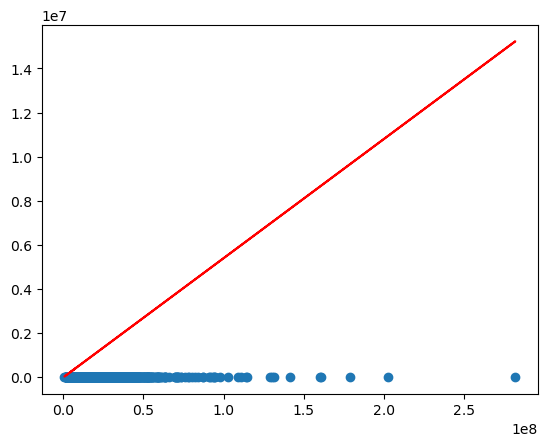

In [11]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

In [12]:
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

C:\Users\chakr\AppData\Local\Temp\ipykernel_27780\3646155897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


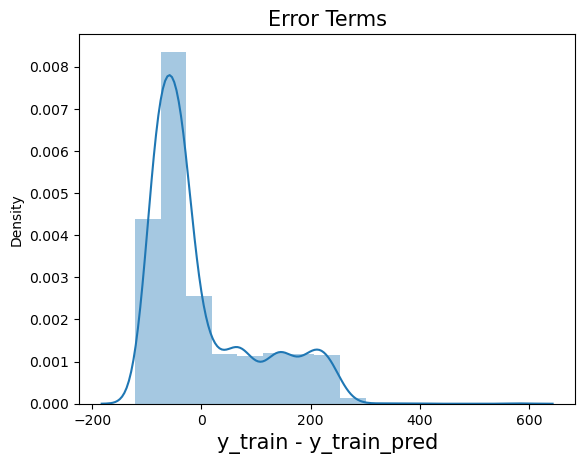

In [13]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Now plot the residuals. Did you get a bell curve?No

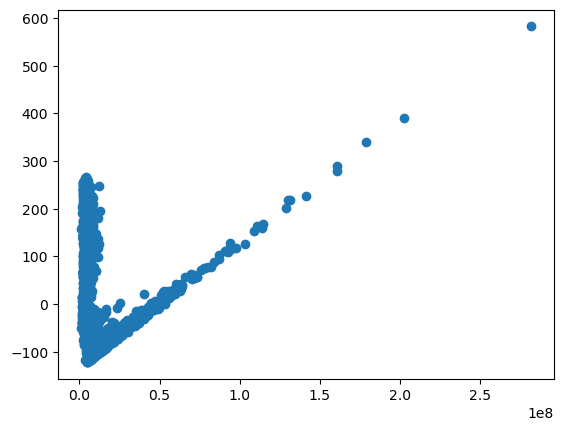

In [15]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [16]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

2424    126.629640
2643    126.306519
2501    129.348848
2044    129.459913
288      41.627761
           ...    
2219    126.805431
2875    129.153414
531      36.117316
2844    128.308966
2689    121.521146
Length: 1162, dtype: float64

In [17]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.11417338575781788

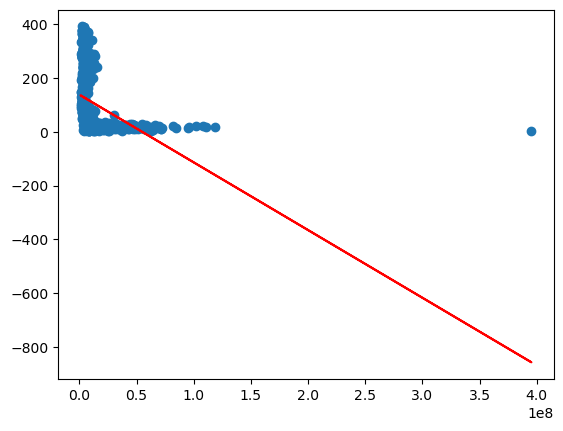

In [18]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [19]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [20]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(2710, 1)
(1162, 1)


In [21]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [22]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 137.8162455837772
Slope : [-2.51848467e-06]


In [23]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.1602189891634057
0.11417338575781788


## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?No
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? No,I would recommend LSTM for stock price prediction